In [ ]:
#The purpose of this analysis is to study what tech stack are commonly used by CTO from Southeast Asia in a company with less than 200 headcounts

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Load the data
df = pd.read_csv(r'C:\Users\hafiz\Desktop\Facia apollo-contacts-export.csv')

df.shape

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   First Name                  580 non-null    object 
 1   Last Name                   554 non-null    object 
 2   Title                       579 non-null    object 
 3   Company                     580 non-null    object 
 4   Company Name for Emails     580 non-null    object 
 5   Email                       533 non-null    object 
 6   Email Status                580 non-null    object 
 7   Email Confidence            29 non-null     float64
 8   Seniority                   579 non-null    object 
 9   Departments                 578 non-null    object 
 10  Contact Owner               580 non-null    object 
 11  First Phone                 243 non-null    object 
 12  Work Direct Phone           0 non-null      float64
 13  Home Phone                  0 non-n

In [2]:
#List out unique column in TItle

unique_title = df['Title'].unique()

unique_title

array(['CTO', 'Chief Technology Officer', 'CTO, Co-Founder',
       'Founder and CEO', 'Director and Founder', 'Co-Founder & Director',
       'Founder And CEO', nan, 'Co-Founder & CEO',
       'Co-Founder - Managing Director', 'Founder & CEO',
       'Co-Founder, Art-Project Director', 'Co-founder & Director',
       'CEO and Co Founder', 'Co-Founder and CEO',
       'Head Of Product Development', 'Co-Founder/ Art Director',
       'Co-founder,CTO', 'Founder & Creative Director',
       'Co-Founder & Creative Director', 'Founder & Director',
       'Founder CEO', 'Head product delivery',
       'Co Founder & Director Creatives', 'Co-Founder / Art Director',
       'CTO and Co-Founder', 'Managing Director & Founder',
       'Head of Product & Portfolio Management',
       'Co-Founder, Director of Art', 'Co-founder and CEO',
       'Co-founder & CEO', 'CEO/ Co-Founder', 'Co-Founder / Director',
       'CEO and Founder', 'Studio Director- Co Founder',
       'Co-Founder | CEO',
       'C

In [3]:
title_frequency = df['Title'].value_counts()

pd.set_option('display.max_columns', 500)

display(title_frequency)

Chief Technology Officer           104
Founder & CEO                       65
CTO                                 33
Founder and CEO                     28
Co-Founder & CEO                    21
                                  ... 
CEO & Co-Founder | Entrepreneur      1
Co-Founder and Art Director          1
Founder and Creative Director        1
Co-founder,CTO                       1
Co-Founder, Director                 1
Name: Title, Length: 213, dtype: int64

In [4]:
#as we see, there are some people with title of CEO, chief commercial officer, head of sales which not might be the tech lead.

#so we need to get rid of them


options = ['CTO', 'Chief Technology Officer', 'CTO, Co-Founder',
       'Head Of Product Development',
       'Co-founder,CTO',
       'Head product delivery',
       'CTO and Co-Founder',
       'Head of Product & Portfolio Management',
       'Chief Technology Officer - RubyPlayNetwork', 'CTO, CIO, Founder',
       'CTO Group Head of Platform',
       'Head Of Marketing | Product Manager',
       'Director Of Product Development & Co-Founder', 'CTO & Co-founder',
       'co-CTO', 'Co-Founder/CTO', 'CTO and Founder',
       'CoFounder & CTO', 'CEO & FOUNDER',
       'Co-Founder, Director and Chief Product Officer', 'CTO/Co-founder',
       'Head of Payments | Product Lead',
       'Co-founder & Chief Technology Officer',
       'Co-Founder, CEO and Game Director', 'Founder & Game Director',
       'Co-Founder and Director',
       'Co-Founder And Director BlackSheep Studio.',
       'Founder & Art Director', 'Group CTO', 'Director & Co-founder', 'CTO, Team Lead Developer', 'CO-founder, CEO',
       'Head of Software Development', 'Co-Founder, Director of Gameplay',
       'Director and Co-Founder', 'Co-Founder and CEO at Flutrr',
       'Director and Co-founder', 'Head of Product Services',
      'Head of Product Development',
       'Head of Product and Strategy', 'CIO / CTO', 'Founder And Ceo',
       'Director / Founder', 'Co-Founder and Chief Technical Officer',
       'ceo & co-founder',
       'Head of Product & Co-Founder','CTO & Co-Founder',
       'Co-Founder & Chief Technology Officer',
       'Chief Technology Officer and Producer', 'Co-Founder | CTO',
       'Product Development Head',  'Executive Director and CTO (SportsUnity)',
       'Chief Technology Officer | Technology & Innovation',
       'Founder- Technical Director', 'CTO (Games)', 'Video Editor',
       'Founder & CTO', 'Deputy Chief Technology Officer',
       'Co-Founder | Product Director',
       'Founder  and Chief Executive Officer',
       'Co-Founder, Lorescribbler and CTO',
       'Co-Founder, Executive Director',
       'Founder & Chief Technology Officer',
       'Co-founder & Tech Director', 
       'Head of Product & Development', 'Co-Founder & Co CEO',
       'CTO/ Technical Program Manager', 'Founder & Executive Director',
       'Head of Product and Sales', 'Co-Founder, Director'] 

df_tech_lead = df[df['Title'].isin(options)]

df_tech_lead.reset_index(drop = True)

,First Name,Last Name,Title,Company,Company Name for Emails,Email,Email Status,Email Confidence,Seniority,Departments,Contact Owner,First Phone,Work Direct Phone,Home Phone,Mobile Phone,Corporate Phone,Other Phone,Stage,Lists,Last Contacted,Account Owner,# Employees,Industry,Keywords,Person Linkedin Url,Website,Company Linkedin Url,Facebook Url,Twitter Url,City,State,Country,Company Address,Company City,Company State,Company Country,Company Phone,SEO Description,Technologies,Annual Revenue,Total Funding,Latest Funding,Latest Funding Amount,Last Raised At,Email Sent,Email Open,Email Bounced,Replied,Demoed,Number of Retail Locations,Apollo Contact Id,Apollo Account Id
0,Swetha,Tibrewal,CTO,FanClash,FanClash,swetha@fanclash.in,Verified,NaN,C suite,"C-Suite, Engineering & Technical",hafiz.jaim@facia.ai,NaN,NaN,NaN,NaN,NaN,NaN,Cold,"For Facia | CTO | BNPL,Dating,Gaming,Car renta...",NaN,hafiz.jaim@facia.ai,29.0,computer games,"gaming, esports, technology",http://www.linkedin.com/in/swethatibrewal,http://www.fanclash.in,http://www.linkedin.com/company/fanclash,NaN,NaN,Gurugram,Haryana,India,"Gurugram, Haryana, India",Gurugram,Haryana,India,NaN,Play your Favorite Online games and earn Excit...,"Route 53, Sendgrid, Gmail, Google Apps, Amazon...",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,6325dd0ed49bc000017a183c,6325dd0fd49bc000017a1953
1,Jigar,Patel,Chief Technology Officer,Ability Games Limited,Ability Games Limited,patel.jigar@abilitygames.in,Verified,NaN,C suite,"C-Suite, Engineering & Technical",hafiz.jaim@facia.ai,NaN,NaN,NaN,NaN,NaN,NaN,Cold,"For Facia | CTO | BNPL,Dating,Gaming,Car renta...",NaN,hafiz.jaim@facia.ai,56.0,computer games,"gaming, online gaming, game development",http://www.linkedin.com/in/jigar-patel-2a26b560,http://www.abilitygames.in,http://www.linkedin.com/company/ability-games-...,https://www.facebook.com/abilitygame/,NaN,Ahmedabad,Gujarat,India,"Street No 25, Kolkata, West Bengal, India, 700091",Kolkata,West Bengal,India,NaN,NaN,"Mobile Friendly, Google Font API, Apache, Open...",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,6325dd0ed49bc000017a183d,6325dd0fd49bc000017a1954
2,Kamatchinathan,Subramanian,Chief Technology Officer,NokOut Interactive,NokOut Interactive,NaN,Unavailable,NaN,C suite,"C-Suite, Engineering & Technical",hafiz.jaim@facia.ai,'+919841753567,NaN,NaN,NaN,'+919841753567,NaN,Cold,"For Facia | CTO | BNPL,Dating,Gaming,Car renta...",NaN,hafiz.jaim@facia.ai,19.0,computer games,game design & mobile game development,http://www.linkedin.com/in/kamatchinathan-subr...,http://www.nokoutgames.com,http://www.linkedin.com/company/nokoutgames,https://www.facebook.com/NokoutGames/,NaN,Pune,Maharashtra,India,"Chennai, Tamil Nadu, India",Chennai,Tamil Nadu,India,'+919841753567,NaN,"GoDaddy Hosting, reCAPTCHA, Google Play, GoDad...",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,6325dd34562ee700019b46d6,6325dd34562ee700019b46f2
3,Yu-Xi,Lim,Chief Technology Officer,Goldbell Group,Goldbell Group,yu-xi.lim@goldbell.com.sg,Verified,NaN,C suite,"C-Suite, Engineering & Technical",hafiz.jaim@facia.ai,6861 0007,NaN,NaN,NaN,6861 0007,NaN,Cold,"For Facia | CTO | BNPL,Dating,Gaming,Car renta...",NaN,hafiz.jaim@facia.ai,160.0,automotive,"commercial vehicles distributor, industrial ve...",http://www.linkedin.com/in/limyuxi,http://www.goldbell.com.sg,http://www.linkedin.com/company/goldbellgroup,NaN,NaN,NaN,NaN,Singapore,"47 Scotts Road, Singapore, Singapore, 228233",Singapore,NaN,Singapore,6861 0007,NaN,"Outlook, Microsoft Office 365, Microsoft Appli...",2400000.0,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,6325dd34562ee700019b46e0,6325dd34562ee700019b46fa
4,Glenn,Morton,"CTO, Co-Founder",Komo,Komo,glenn@komo.digital,Verified,NaN,Founder,"C-Suite, Engineering & Technical",hafiz.jaim@facia.ai,'+61 1300081166,NaN,NaN,NaN,'+61 1300081166,NaN,Cold,"For Facia | CTO | BNPL,Dating,Gaming,Car renta...",NaN,hafiz.jaim@facia.ai,25.0,information technology & services,"saas, mobile games, mobile advertising, m

In [20]:
#now we want to figure out how to extract substring from technologies column and count it
#such  us how many people are using Amazon AWS for example

type(df_tech_lead['Technologies'])
print(df_tech_lead['Technologies'][0])

Route 53, Sendgrid, Gmail, Google Apps, Amazon AWS, React Redux, Bootstrap Framework, Apache, Twitter Advertising, Ubuntu, Facebook Login (Connect), Mobile Friendly, Facebook Custom Audiences, WordPress.org, Google Tag Manager, Facebook Widget, Google Font API


In [21]:
import re


tech_stck = re.findall(r'\w+', df_tech_lead['Technologies'][2])

print(tech_stck)

['GoDaddy', 'Hosting', 'reCAPTCHA', 'Google', 'Play', 'GoDaddy', 'Verified', 'JQuery', '1', '11', '1', 'Bootstrap', 'Framework', 'Apache', 'WordPress', 'org', 'Mobile', 'Friendly']


In [7]:
corpus=[]

for str in tech_stck:
    corpus.append(str)

corpus

['GoDaddy',
 'Hosting',
 'reCAPTCHA',
 'Google',
 'Play',
 'GoDaddy',
 'Verified',
 'JQuery',
 '1',
 '11',
 '1',
 'Bootstrap',
 'Framework',
 'Apache',
 'WordPress',
 'org',
 'Mobile',
 'Friendly']

In [22]:
tech_idx = {}
corpus = []
idx = 0

for i,j in  df_tech_lead['Technologies'].iteritems():
    tokens = re.findall(r'\w+', df_tech_lead['Technologies'][i])
    corpus.append(tokens)
    display(corpus)
    for tech in tokens:
        if tech not in tech_idx:
            tech_idx[tech] = idx
            idx += 1
            

  
    

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API']]

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework']]

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly']]

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

[['Route',
  '53',
  'Sendgrid',
  'Gmail',
  'Google',
  'Apps',
  'Amazon',
  'AWS',
  'React',
  'Redux',
  'Bootstrap',
  'Framework',
  'Apache',
  'Twitter',
  'Advertising',
  'Ubuntu',
  'Facebook',
  'Login',
  'Connect',
  'Mobile',
  'Friendly',
  'Facebook',
  'Custom',
  'Audiences',
  'WordPress',
  'org',
  'Google',
  'Tag',
  'Manager',
  'Facebook',
  'Widget',
  'Google',
  'Font',
  'API'],
 ['Mobile',
  'Friendly',
  'Google',
  'Font',
  'API',
  'Apache',
  'OpenSSL',
  'Bootstrap',
  'Framework'],
 ['GoDaddy',
  'Hosting',
  'reCAPTCHA',
  'Google',
  'Play',
  'GoDaddy',
  'Verified',
  'JQuery',
  '1',
  '11',
  '1',
  'Bootstrap',
  'Framework',
  'Apache',
  'WordPress',
  'org',
  'Mobile',
  'Friendly'],
 ['Outlook',
  'Microsoft',
  'Office',
  '365',
  'Microsoft',
  'Application',
  'Insights',
  'Hotjar',
  'reCAPTCHA',
  'Apache',
  'Mobile',
  'Friendly',
  'YouTube',
  'Facebook',
  'Custom',
  'Audiences',
  'Facebook',
  'Widget',
  'Google',
  'F

TypeError: expected string or bytes-like object

In [23]:
tech_idx
       


{'Route': 0,
 '53': 1,
 'Sendgrid': 2,
 'Gmail': 3,
 'Google': 4,
 'Apps': 5,
 'Amazon': 6,
 'AWS': 7,
 'React': 8,
 'Redux': 9,
 'Bootstrap': 10,
 'Framework': 11,
 'Apache': 12,
 'Twitter': 13,
 'Advertising': 14,
 'Ubuntu': 15,
 'Facebook': 16,
 'Login': 17,
 'Connect': 18,
 'Mobile': 19,
 'Friendly': 20,
 'Custom': 21,
 'Audiences': 22,
 'WordPress': 23,
 'org': 24,
 'Tag': 25,
 'Manager': 26,
 'Widget': 27,
 'Font': 28,
 'API': 29,
 'OpenSSL': 30,
 'GoDaddy': 31,
 'Hosting': 32,
 'reCAPTCHA': 33,
 'Play': 34,
 'Verified': 35,
 'JQuery': 36,
 '1': 37,
 '11': 38,
 'Outlook': 39,
 'Microsoft': 40,
 'Office': 41,
 '365': 42,
 'Application': 43,
 'Insights': 44,
 'Hotjar': 45,
 'YouTube': 46,
 'Cloudflare': 47,
 'DNS': 48,
 'CloudFlare': 49,
 'Hubspot': 50,
 'VueJS': 51,
 'Linkedin': 52,
 'Marketing': 53,
 'Solutions': 54,
 'Vidyard': 55,
 'Analytics': 56,
 'Zoho': 57,
 'Email': 58,
 'Atlassian': 59,
 'Cloud': 60,
 'SES': 61,
 'Active': 62,
 'Campaign': 63,
 'BambooHR': 64,
 'Intercom'

In [43]:
#now let's filter out a bit
#we only select those tech stack with count above 70

import matplotlib.pyplot as plt

tech_data = {'Route': 0,
 '53': 1,
 'Sendgrid': 2,
 'Gmail': 3,
 'Google': 4,
 'Apps': 5,
 'Amazon': 6,
 'AWS': 7,
 'React': 8,
 'Redux': 9,
 'Bootstrap': 10,
 'Framework': 11,
 'Apache': 12,
 'Twitter': 13,
 'Advertising': 14,
 'Ubuntu': 15,
 'Facebook': 16,
 'Login': 17,
 'Connect': 18,
 'Mobile': 19,
 'Friendly': 20,
 'Custom': 21,
 'Audiences': 22,
 'WordPress': 23,
 'org': 24,
 'Tag': 25,
 'Manager': 26,
 'Widget': 27,
 'Font': 28,
 'API': 29,
 'OpenSSL': 30,
 'GoDaddy': 31,
 'Hosting': 32,
 'reCAPTCHA': 33,
 'Play': 34,
 'Verified': 35,
 'JQuery': 36,
 '1': 37,
 '11': 38,
 'Outlook': 39,
 'Microsoft': 40,
 'Office': 41,
 '365': 42,
 'Application': 43,
 'Insights': 44,
 'Hotjar': 45,
 'YouTube': 46,
 'Cloudflare': 47,
 'DNS': 48,
 'CloudFlare': 49,
 'Hubspot': 50,
 'VueJS': 51,
 'Linkedin': 52,
 'Marketing': 53,
 'Solutions': 54,
 'Vidyard': 55,
 'Analytics': 56,
 'Zoho': 57,
 'Email': 58,
 'Atlassian': 59,
 'Cloud': 60,
 'SES': 61,
 'Active': 62,
 'Campaign': 63,
 'BambooHR': 64,
 'Intercom': 65,
 'Amplitude': 66,
 'Nginx': 67,
 'MailChimp': 68,
 'SPF': 69,
 'Zendesk': 70,
 'JivoSite': 71,
 'DigitalOcean': 72,
 'Digital': 73,
 'Ocean': 74,
 'iTunes': 75,
 'Varnish': 76,
 'Wix': 77,
 'AdSense': 78,
 'Grafana': 79,
 'Jira': 80,
 'Confluence': 81,
 'Create': 82,
 'App': 83,
 'SendInBlue': 84,
 'Helpscout': 85,
 'UpCloud': 86,
 'comScore': 87,
 'Sizmek': 88,
 'MediaMind': 89,
 'AngularJS': 90,
 'IIS': 91,
 'ASP': 92,
 'NET': 93,
 'Plus': 94,
 'Squarespace': 95,
 'ECommerce': 96,
 'DoubleClick': 97,
 'Stripe': 98}

tech_data_70_above = dict(filter(lambda elem: elem[1] > 70, tech_data.items()))

print(tech_data_70_above)


{'JivoSite': 71, 'DigitalOcean': 72, 'Digital': 73, 'Ocean': 74, 'iTunes': 75, 'Varnish': 76, 'Wix': 77, 'AdSense': 78, 'Grafana': 79, 'Jira': 80, 'Confluence': 81, 'Create': 82, 'App': 83, 'SendInBlue': 84, 'Helpscout': 85, 'UpCloud': 86, 'comScore': 87, 'Sizmek': 88, 'MediaMind': 89, 'AngularJS': 90, 'IIS': 91, 'ASP': 92, 'NET': 93, 'Plus': 94, 'Squarespace': 95, 'ECommerce': 96, 'DoubleClick': 97, 'Stripe': 98}


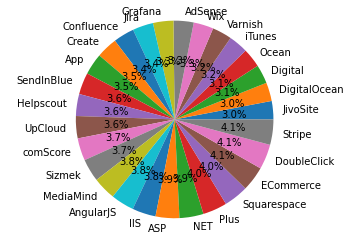

In [44]:
# Data to plot
tech_stack = []
Count = []
sum_of_sizes = np.sum(Count)

for x, y in tech_data_70_above.items():
    tech_stack.append(x)
    Count.append(y)
    
    

# Plot
plt.pie(Count, labels=tech_stack,autopct='%1.1f%%')

plt.axis('equal')
plt.show()

In [10]:
#Above is the tech stack that use by most CTO in southeast asia



(211, 99)